This notebook is designed to highlight interesting areas from the data to demonstrate trends in certain features of players. It can also present the ability to compare clubs

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the dataset and read the categories available

In [2]:

# Using fifa 21 dataset
fifa_21 = pd.read_csv('players_21.csv')

fifa_21.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [3]:
unwanted_columns = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']
# Dropping unwanted columns
fifa_21.drop(unwanted_columns, axis=1, inplace=True)

# Convert player_positions string to list
fifa_21['player_positions'] = fifa_21['player_positions'].str.split(',')

# Create primary_position from first position in list
fifa_21['primary_position'] = fifa_21['player_positions'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
    

In [4]:
# Convert skill columns to numeric
skill_cols = ['dribbling', 'defending', 'passing', 'shooting', 'pace', 'physic']
for col in skill_cols:
    fifa_21[col] = pd.to_numeric(fifa_21[col], errors='coerce')

This is to clean data and make a plot of overall rating and their value

0


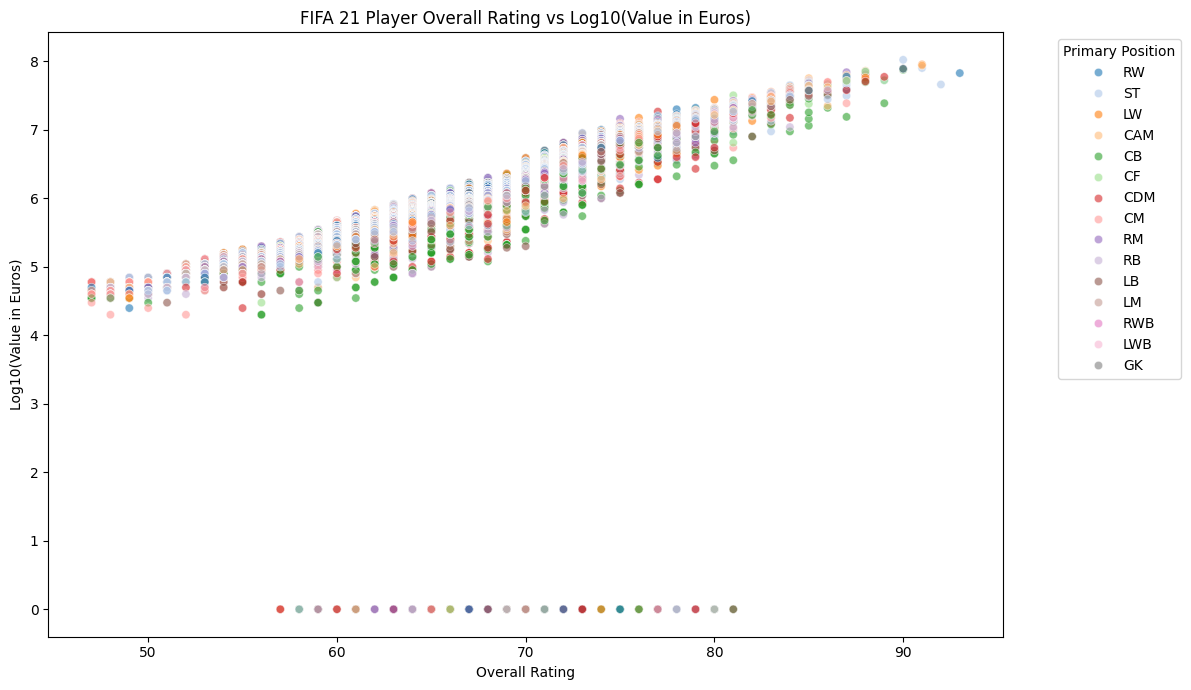

In [5]:
# Check how many rows have missing primary_position
print(fifa_21['primary_position'].isna().sum())

# Fill missing primary_position with 'Unknown' or drop only those rows with missing primary_position
fifa_21['primary_position'] = fifa_21['primary_position'].fillna('Unknown')

# Now drop rows with NaNs only in important numeric columns, e.g. skills or value
fifa_21.dropna(subset=skill_cols + ['value_eur'], inplace=True)

# Recalculate log_value with zeros replaced by 1
fifa_21['log_value'] = np.log10(fifa_21['value_eur'].replace(0, 1))

# Now plot without dropping anything else
plt.figure(figsize=(12, 7))
sns.scatterplot(data=fifa_21, x='overall', y='log_value',
                hue='primary_position', alpha=0.6, palette='tab20')
plt.title('FIFA 21 Player Overall Rating vs Log10(Value in Euros)')
plt.xlabel('Overall Rating')
plt.ylabel('Log10(Value in Euros)')
plt.legend(title='Primary Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



As expected, players that have a higher rating will have a higher value, some players have a value of 0 irrespective of rating due to being free agents.

Text(0.5, 1.0, 'Preferred Foot Distribution')

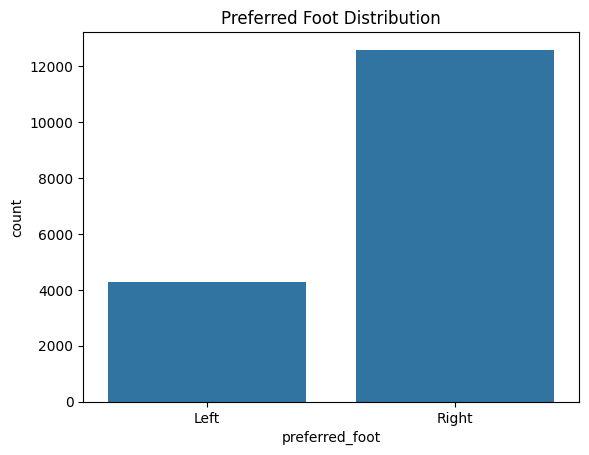

In [6]:
# plot of right foot vs left foot
sns.countplot(data=fifa_21, x='preferred_foot')
plt.title('Preferred Foot Distribution')

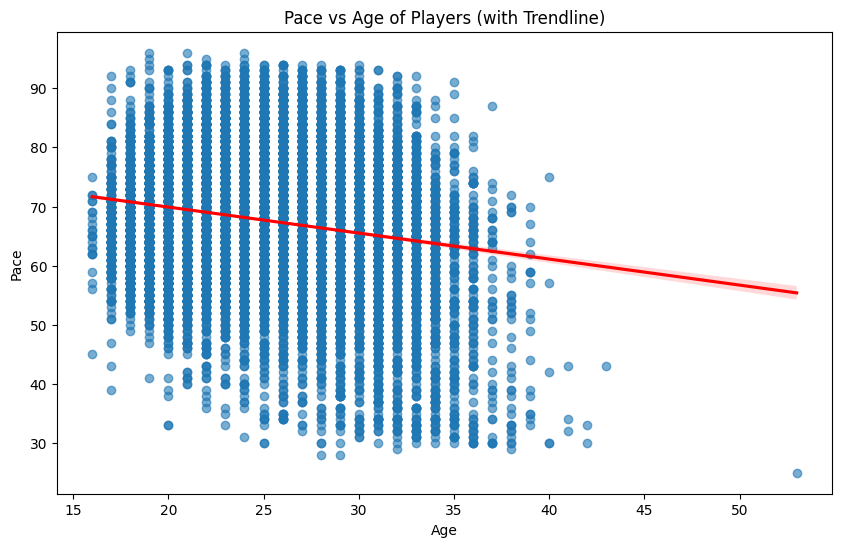

In [7]:
# plot of age vs pace with trendline
plt.figure(figsize=(10, 6))
sns.regplot(data=fifa_21, x='age', y='pace', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Pace vs Age of Players (with Trendline)')
plt.xlabel('Age')
plt.ylabel('Pace')
plt.show()


The use of a trendline makes it more clear to see that with age players become slower. Older players may still retain speed and young players may be slow since position also determines how fast a player might be, not just age. Overall, the top speed of players decreases with age suggesting that the fastest players (or players in positions that require speed) get slower with age.

C:\Users\arifu\AppData\Local\Temp\ipykernel_1988\2351016449.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_clubs, x='num_players', y='club', palette='viridis')


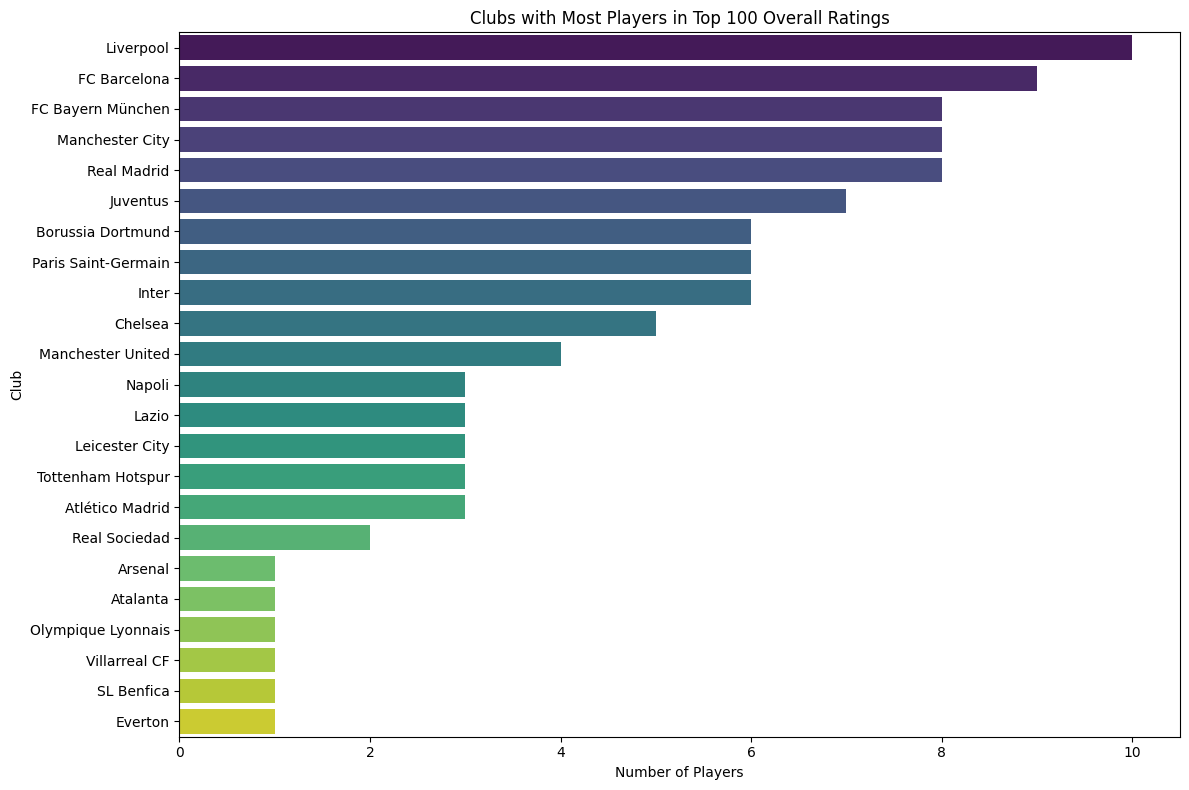

In [8]:

# Get top 100 players by overall rating
top_100 = fifa_21.nlargest(100, 'overall')

# Count number of players per club
top_100_clubs = top_100['club_name'].value_counts().reset_index()
top_100_clubs.columns = ['club', 'num_players']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_100_clubs, x='num_players', y='club', palette='viridis')
plt.title('Clubs with Most Players in Top 100 Overall Ratings')
plt.xlabel('Number of Players')
plt.ylabel('Club')
plt.tight_layout()
plt.show()


C:\Users\arifu\AppData\Local\Temp\ipykernel_1988\3903875651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fifa_21[fifa_21['club_name'].isin(['Manchester City', 'Liverpool'])],


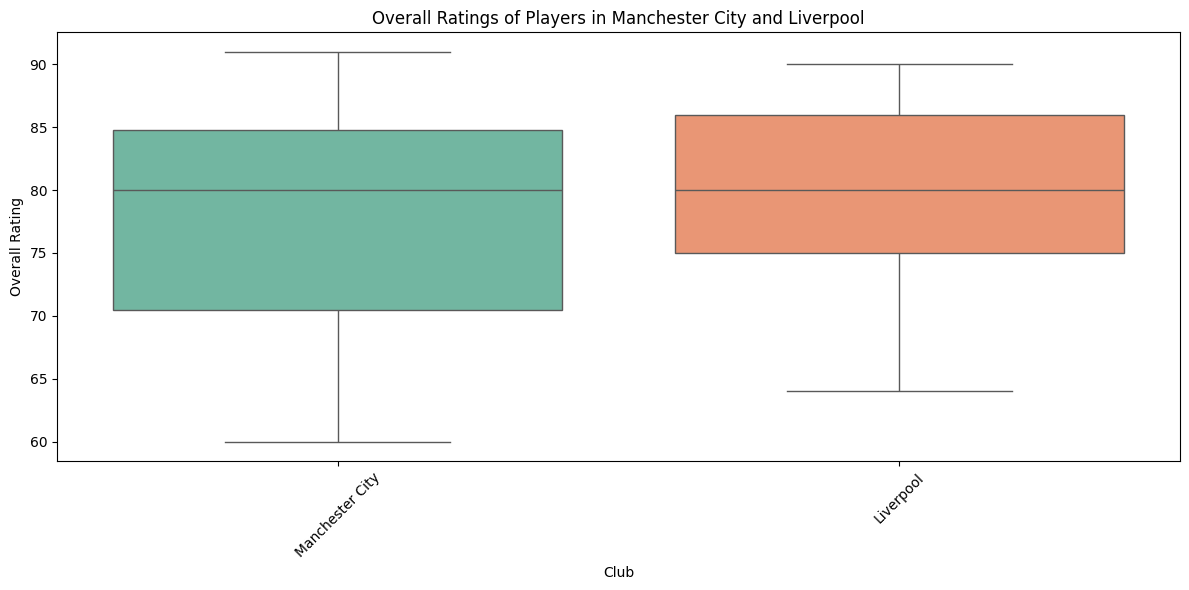

In [9]:
# boxplot of overall rating in manchester city and liverpool
plt.figure(figsize=(12, 6))
sns.boxplot(data=fifa_21[fifa_21['club_name'].isin(['Manchester City', 'Liverpool'])],
            x='club_name', y='overall', palette='Set2')
plt.title('Overall Ratings of Players in Manchester City and Liverpool')
plt.xlabel('Club')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# statistics of overall rating in manchester city vs liverpool

# the mean overall rating of players in Manchester City
mean_mc = fifa_21[fifa_21['club_name'] == 'Manchester City']['overall'].mean()
print(f"Mean Overall Rating of Manchester City Players: {mean_mc:.2f}") 

# the mean overall rating of players in Liverpool
mean_liv = fifa_21[fifa_21['club_name'] == 'Liverpool']['overall'].mean()
print(f"Mean Overall Rating of Liverpool Players: {mean_liv:.2f}")

# the median overall rating of players in Manchester City
median_mc = fifa_21[fifa_21['club_name'] == 'Manchester City']['overall'].median()
print(f"Median Overall Rating of Manchester City Players: {median_mc:.2f}") 

# the median overall rating of players in Liverpool
median_liv = fifa_21[fifa_21['club_name'] == 'Liverpool']['overall'].median()
print(f"Median Overall Rating of Liverpool Players: {median_liv:.2f}")

# the standard deviation of overall rating of players in Manchester City
std_mc = fifa_21[fifa_21['club_name'] == 'Manchester City']['overall'].std()
print(f"Standard Deviation of Overall Rating of Manchester City Players: {std_mc:.2f}")

# the standard deviation of overall rating of players in Liverpool  
std_liv = fifa_21[fifa_21['club_name'] == 'Liverpool']['overall'].std()
print(f"Standard Deviation of Overall Rating of Liverpool Players: {std_liv:.2f}")



Mean Overall Rating of Manchester City Players: 77.43
Mean Overall Rating of Liverpool Players: 78.90
Median Overall Rating of Manchester City Players: 80.00
Median Overall Rating of Liverpool Players: 80.00
Standard Deviation of Overall Rating of Manchester City Players: 9.23
Standard Deviation of Overall Rating of Liverpool Players: 8.35


We have created a statistical summary of two clubs Liverpool and Manchester City, the code above gives further detail to the boxplot. While both clubs have a similar average rating, City have more players and a higher range as suggested by the boxplot which explains why they have a higher standard deviation.